In [420]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [421]:
#定义读取数据掉得函数
def get_data():
    data=load_svmlight_file('./australian_scale')
    return data[0].todense(),data[1]
#获取数据
X,y=get_data()
#将y值置为n*1的列向量
y=np.reshape(y,(len(y),1))

In [422]:
#切分训练集和验证集
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=22)

In [423]:
#定义损失函数hinge loss
def hingeloss(X,y,w):
    l=1-np.multiply(y,X*w)              #先做点乘
    l2=(l>=0)                           #然后求出哪个元素大于等于0，化成布尔矩阵
    result=np.multiply(l,l2)            #通过点乘进行筛选，大于等于0的项保留，小于0的项清除变为0
    return np.mean(result)

hingeloss公式：
$$hingeloss=\xi=max(0,1-y_i(W^Tx_i+b))$$

In [424]:
#准确率计算函数
def accuracy(X,w,y):
    threshold=0.5                          #选则阈值
    y_predict=X*w                          #得到X，w的预测结果
    val=np.multiply(y,y_predict)
    N=np.zeros((len(y),1))                  
    N[val>=threshold]=1      #与y预测值与y真实值相乘,积大于阈值赋值1，表示分类正确,否则为0及分类错误，得到表示结果正确与否的0-1列向量
    return np.mean(N)                 #得到准确率

In [425]:
#梯度公式
def gradient(X,y,w,C):
    l=1-np.multiply(y,X*w)          #先做点乘
    l2=(l>=0)                       #然后求出哪个元素大于等于0，化成布尔矩阵
    tmp=np.multiply(y,l2)           #通过点乘进行筛选，大于等于0的项保留，小于0的项清除变为0
    return w-C*np.sum(np.multiply(X,tmp),0).T  #计算最终梯度


梯度公式：
$$gradient=w-C\sum_{i=1}^{n}(x_iy_i)y\__i$$
其中$y\__i$=1 if $y_i(w^Tx_i)<1 $ else $y\__i=0$ 

In [426]:
#获取训练集的维度
(n,m)=np.shape(X_train)
#训练集增加一列，作为bias
X_train=np.hstack((X_train,np.ones((n,1))))
#获取测试集的维度
(n,m)=np.shape(X_valid)
#测试集增加一列，作为bias
X_valid=np.hstack((X_valid,np.ones((n,1))))
# 使用正态初始化
w=np.random.standard_normal([X.shape[1]+1,1])

In [427]:
#设置迭代次数
epco=5000
times=range(epco)    #迭代次数
#初始化参数
eta=0.0001
C=0.5

In [428]:
#定义SVM分类函数
def SVMClassification(X,y,w,eta,epco,C,gradient=gradient,loss=hingeloss,accuracy=accuracy):
    l_train=[]             #训练集误差
    l_test=[]              #测试集误差
    train_accuracy=[]
    test_accuracy=[]
    for  i in range(epco):
        grad=gradient(X,y,w,C)
        w=w-eta*(grad)
        train_accuracy.append(accuracy(X,w,y))
        test_accuracy.append(accuracy(X_valid,w,y_valid))
        l_train.append(hingeloss(X,y,w))
        l_test.append(hingeloss(X_valid,y_valid,w))
    return l_train,l_test,train_accuracy,test_accuracy

In [429]:
l_train,l_test,train_accuracy,test_accuracy=SVMClassification(X=X_train,y=y_train,w=w,eta=eta,epco=epco,C=C)
print(train_accuracy[-1])
print(test_accuracy[-1])   

0.859213250518
0.850241545894


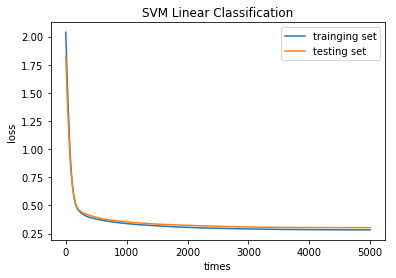

In [430]:
plt.title("SVM Classification (loss)")
plt.xlabel('times')
plt.ylabel("loss")
plt.title("SVM Linear Classification")
plt.plot(times,l_train,label="trainging set")
plt.plot(times,l_test,label="testing set")

plt.legend()
plt.show()

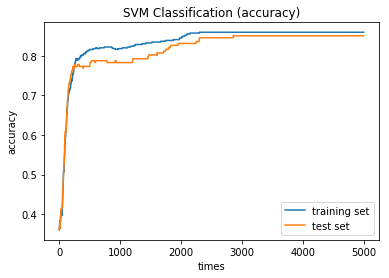

In [431]:
plt.title("SVM Classification (accuracy)")
plt.xlabel('times')
plt.ylabel('accuracy')
plt.plot(times,train_accuracy,label="training set")
plt.plot(times,test_accuracy,label="test set")
plt.legend()
plt.show()